Total coordinates read: 42
np array 'x' length: 42
np array 'y' length: 42
np array 'z' length: 42


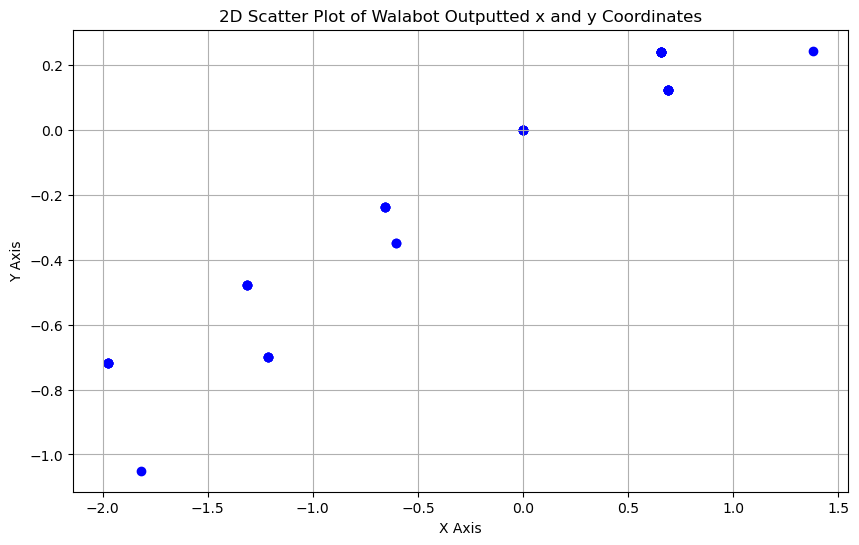

In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import os

# Read text from txt file to create individual x, y, and z np.arrays of their corresponding Walabot outputted values
def read_data(filename):
    x, y, z = np.array([]), np.array([]), np.array([])

    with open(filename, 'r') as f:
        for line in f:
            if line.startswith("  x:"):  # Ensuring we parse valid coordinate lines
                parts = line.replace("cm", "").split(",")  # Remove 'cm' and split
                x_val = float(parts[0].split(":")[1].strip())
                y_val = float(parts[1].split(":")[1].strip())
                z_val = float(parts[2].split(":")[1].strip())

                # Append values properly
                x = np.append(x, x_val)
                y = np.append(y, y_val)
                z = np.append(z, z_val)

    print(f"Total coordinates read: {len(x)}")
    return x, y, z

# Plot output using plotly.graph_objects, is 3D
def plot_data_plotly(x, y, z):
    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            size=5,
            color=x,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )])

    fig.update_layout(scene = dict(
                        xaxis_title='X Axis',
                        yaxis_title='Y Axis',
                        zaxis_title='Z Axis'),
                      margin=dict(r=20, b=10, l=10, t=35),
                      title='3D Plot of Walabot Outputted x, y, and z Coordinates',
                      title_x=0.5)
    fig.show()

# Plot output using matplotlib, is 2D
def plot_data_matplotlib(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c='blue', marker='o')
    plt.title('2D Scatter Plot of Walabot Outputted x and y Coordinates')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.grid(True)
    plt.show()

file_path = "walabotOut_txt/walabotOut_20250208_221137.txt"

# Ensure the file exists before reading
if os.path.exists(file_path):
    x, y, z = read_data(file_path)
    print("np array 'x' length:", len(x))
    print("np array 'y' length:", len(y))
    print("np array 'z' length:", len(z))
    plot_data_matplotlib(x, y)
    plot_data_plotly(x, y, z)
else:
    print(f"Error: File '{file_path}' not found.")